In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import *
import itertools
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
grad = pd.read_csv('data/grad.csv'); 
grad

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [4]:
grad.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


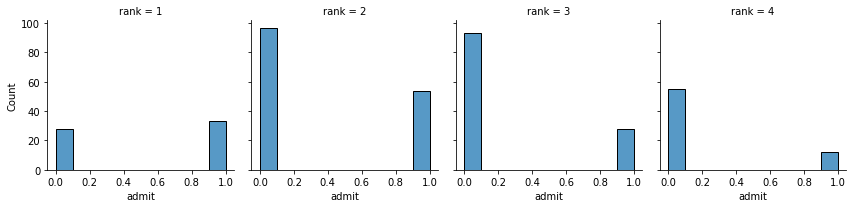

In [6]:
sns.displot(grad, x="admit", col="rank",height=3, facet_kws=dict(margin_titles=True))

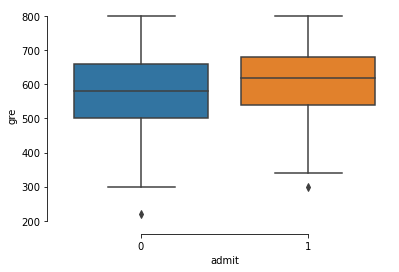

In [8]:
sns.boxplot(x="admit", y="gre", data=grad)
sns.despine(offset=10, trim=True)

In [12]:
# Parte 2
y = grad['admit']
X = grad[['gre','gpa','rank']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
kf = KFold(n_splits=5)
metrics = np.zeros(shape=(5, 3))
model = LogisticRegression()
i=0
for train_index, test_index in kf.split(X_train):
    x_train_kf = X.iloc[train_index]
    x_test_kf = X.iloc[test_index]
    y_train_kf = y[train_index]
    y_test_kf = y[test_index]    
    model.fit(x_train_kf,y_train_kf)
    yhat = model.predict(x_test_kf)
    metrics[i,0] = accuracy_score(y_test_kf,yhat)
    metrics[i,1] = precision_score(y_test_kf,yhat)
    metrics[i,2] = recall_score(y_test_kf,yhat)
    i+=1

metrics = pd.DataFrame(metrics, columns=['Accuracy','Precision','Recall'])
metrics

,Accuracy,Precision,Recall
0,0.666667,0.857143,0.260870
1,0.759259,0.454545,0.416667
2,0.796296,0.625000,0.384615
3,0.735849,0.500000,0.285714
4,0.679245,1.000000,0.105263


In [14]:
ranks = pd.get_dummies(grad['rank'],prefix='rank')

In [15]:
grad = pd.concat([grad[['admit','gre','gpa']],ranks],axis=1,)
grad


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
...,...,...,...,...,...,...,...
395,0,620,4.00,0,1,0,0
396,0,560,3.04,0,0,1,0
397,0,460,2.63,0,1,0,0
398,0,700,3.65,0,1,0,0


In [16]:
y2 = grad['admit']
X2 = grad[['gre','gpa','rank_1','rank_2','rank_3','rank_4']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [17]:
def get_metrics(X,y,k):
    kf = KFold(n_splits=k)
    metrics = np.zeros(shape=(k, 3))
    model = LogisticRegression()
    i=0
    for i,(train_index, test_index) in enumerate(kf.split(X)):
        x_train_kf = X.iloc[train_index]
        x_test_kf = X.iloc[test_index]
        y_train_kf = y.iloc[train_index]
        y_test_kf = y.iloc[test_index]    
        model.fit(x_train_kf,y_train_kf)
        yhat = model.predict(x_test_kf)
        metrics[i,0] = accuracy_score(y_test_kf,yhat)
        metrics[i,1] = precision_score(y_test_kf,yhat)
        metrics[i,2] = recall_score(y_test_kf,yhat)
        i+=1

    metrics = pd.DataFrame(metrics, columns=['Accuracy','Precision','Recall'])
    return metrics

In [18]:
metrics2 = get_metrics(X2_train, y2_train, 5)

C:\Users\NGALAZ\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NGALAZ\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [19]:
metrics2.mean()

Accuracy     0.686443
Precision    0.630000
Recall       0.152534
dtype: float64

In [20]:
metrics.mean()

Accuracy     0.727463
Precision    0.687338
Recall       0.290626
dtype: float64

In [21]:
model_final = LogisticRegression().fit(X_train,y_train)
model_final.predict(X_test)
prob = model_final.predict_proba(X_test)

In [22]:
fpr, tpr, th = roc_curve(y_test, prob[:,1])

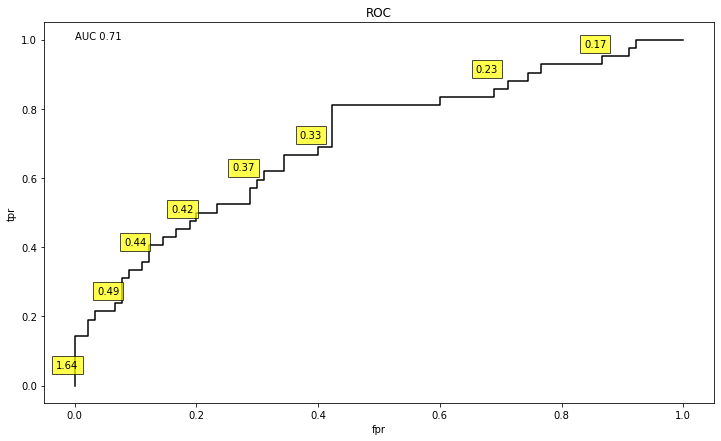

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('ROC')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
ax.plot(fpr,tpr, c='black')
for i, (x,y,thr) in enumerate(zip(fpr,tpr,th)):
    if i % 7 == 0:
        ax.text(x-.03,y+.05,round(thr,2), bbox = {'facecolor':'yellow', 'alpha': 0.7})
ax.text(0,1, f'AUC {round(roc_auc_score(y_test,prob[:,1]),2)}');

In [25]:
for f,t,x in zip(fpr, tpr, th):
    if (t > 0.60) and (f < 0.40):
        print(f.round(2), t.round(2), x.round(2))

0.31 0.62 0.36
0.34 0.62 0.35
0.34 0.67 0.34


In [34]:
model = LogisticRegression()
model.fit(X_train,y_train)
prob = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, prob[:,1])

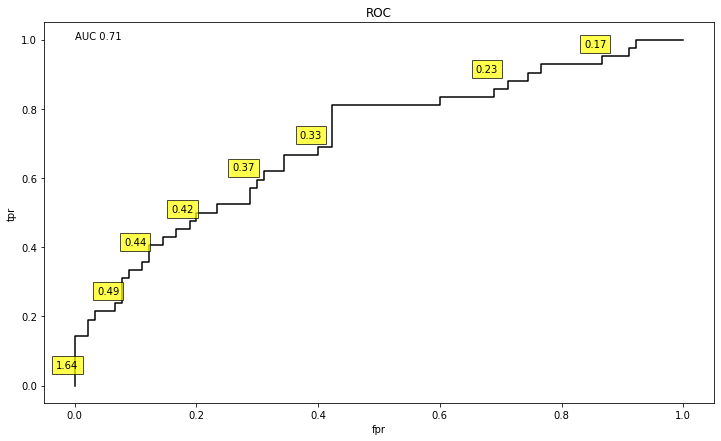

In [28]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('ROC')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
ax.plot(fpr,tpr, c='black')
for i, (x,y,thr) in enumerate(zip(fpr,tpr,th)):
    if i % 7 == 0:
        ax.text(x-.03,y+.05,round(thr,2), bbox = {'facecolor':'yellow', 'alpha': 0.7})
ax.text(0,1, f'AUC {round(roc_auc_score(y_test,prob[:,1]),2)}');

In [29]:
for f,t,x in zip(fpr, tpr, th):
    if (t > 0.60) and (f < 0.40):
        print(f.round(2), t.round(2), x.round(2))

0.31 0.62 0.36
0.34 0.62 0.35
0.34 0.67 0.34


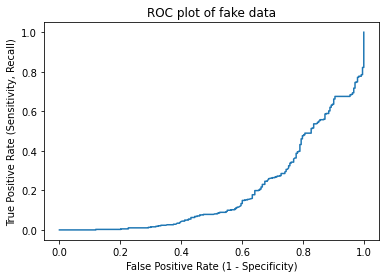

In [39]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/loanf.csv')
y = (df['Interest.Rate'] <= 12).values
X = df[['FICO.Score', 'Loan.Length', 'Loan.Amount']].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve(y_test,probabilities)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()